<Axes: >

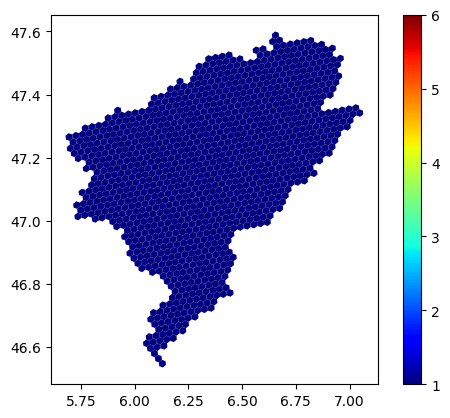

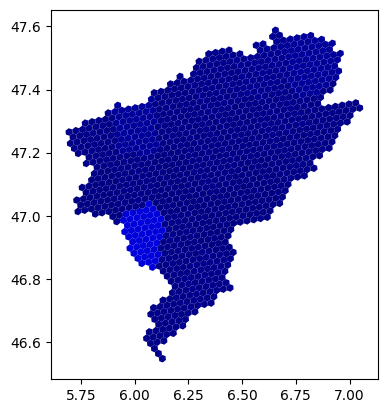

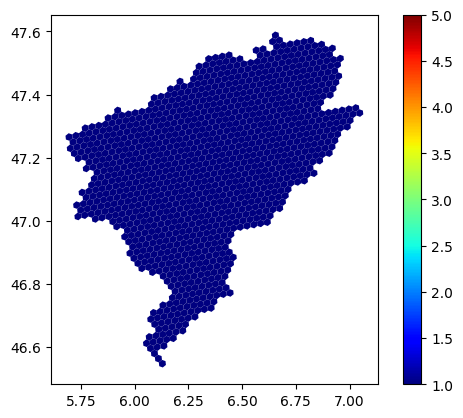

In [2]:
import geopandas as gpd

geo = gpd.read_file('hexagones_today_final.geojson')
geo.plot(column='fire_prediction', vmin=1, vmax=6, cmap='jet', legend=True)
geo.plot(column='fire_prediction_raw', cmap='jet', vmin=0, vmax=20)
geo.plot(column='fire_prediction_dept', cmap='jet', vmin=1, vmax=5, legend=True)

In [24]:
import sys
sys.path.insert(0,'/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/')
from weigh_predictor import *
from tools import *
from graph_structure import *

graph = read_object('graph_10.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/inference/firepoint/train/'))
predictor = read_object('departement-01-ainPredictorDepartement.pkl', Path('/home/caron/Bureau/Model/HexagonalScale/ST-GNN-for-wildifre-prediction/Prediction/GNN/inference/firepoint/train/influenceClustering'))

In [25]:
predictor.cluster_centers

array([[84.4685274 ],
       [16.35187742],
       [53.8065381 ],
       [33.29310836],
       [ 3.2156678 ]])

In [19]:
geo['longitude'] = geo['geometry'].apply(lambda x : float(x.centroid.x))
geo['latitude'] = geo['geometry'].apply(lambda x : float(x.centroid.y))

<Axes: >

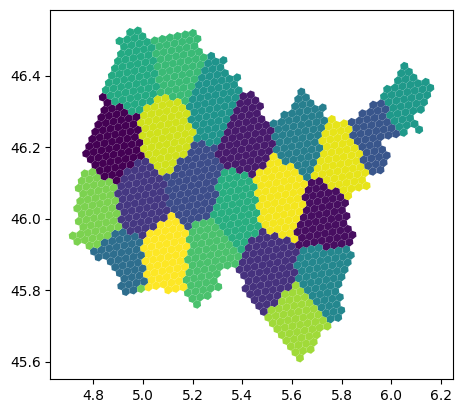

In [20]:
X = list(zip(geo.longitude, geo.latitude))
geo['id'] = graph._predict_node(X)
geo.plot(column='id')

In [21]:
geo.groupby('id')['fire_prediction_raw'].mean().values

array([2.9400129 , 1.97939663, 2.66466834, 1.93306015, 1.71658852,
       2.14790591, 2.76018191, 2.04020057, 3.20375656, 1.99086794,
       2.60629383, 2.97475892, 3.69361269, 2.14016264, 1.62158656,
       2.29092608, 1.64949898, 2.16412054, 1.80540039, 4.66459544,
       2.8810513 , 2.97161353, 2.09969479])

In [26]:
today_risk = np.nansum(geo.groupby('id')['fire_prediction_raw'].mean().values)
print(today_risk)

56.93995511180911


In [23]:
deptrisk = order_class(predictor, predictor.predict(np.array(today_risk)))[0] + 1
deptrisk

4

In [5]:
predictor.log()

############# Histogram ###############
[299 407 146 608 196]
############# Cluster Centers ###############
[[34.81633333]
 [18.50182238]
 [84.4685274 ]
 [ 5.96928548]
 [54.49707653]]


In [6]:
risk = geo.fire_prediction_raw.sum()
print(risk)

2628.902248919137


In [46]:
import pandas as pd
import datetime as dt

file = pd.read_feather('incendie_final.feather')
#file = file[file['date'] >= dt.datetime.strptime('2024-05-20', '%Y-%m-%d').date()]
#file[file['feux'] > 0]

<Axes: >

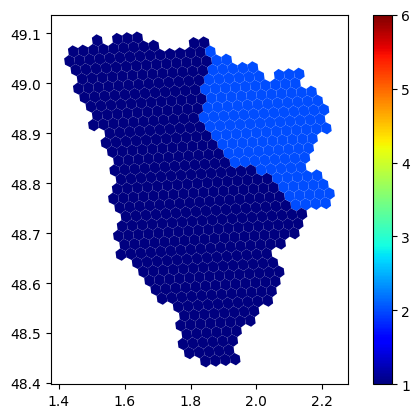

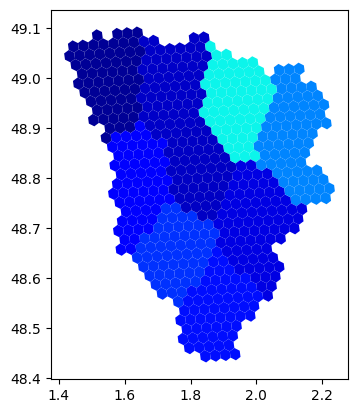

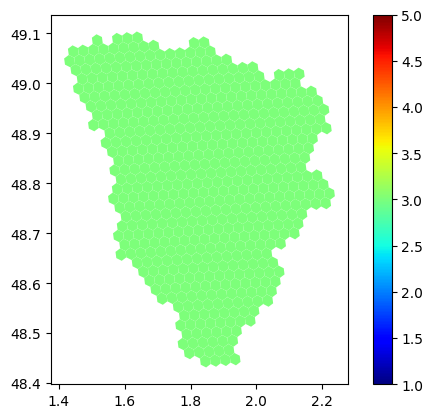

In [2]:
import geopandas as gpd

geo = gpd.read_file('hexagones_tomorrow_final.geojson')
geo.plot(column='fire_prediction', vmin=1, vmax=6, cmap='jet', legend=True)
geo.plot(column='fire_prediction_raw', cmap='jet', vmin=0, vmax=20)
geo.plot(column='fire_prediction_dept', cmap='jet', vmin=1, vmax=5, legend=True)

<Axes: >

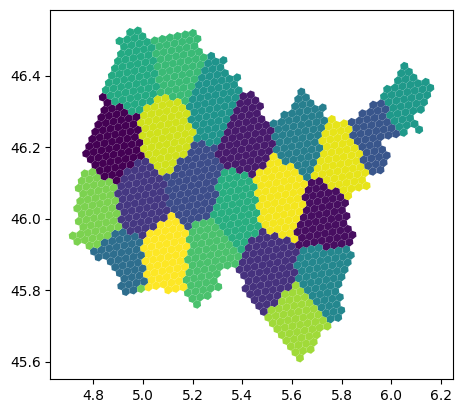

In [30]:
geo['longitude'] = geo['geometry'].apply(lambda x : float(x.centroid.x))
geo['latitude'] = geo['geometry'].apply(lambda x : float(x.centroid.y))
X = list(zip(geo.longitude, geo.latitude))
geo['id'] = graph._predict_node(X)
geo.plot(column='id')

In [31]:
geo.groupby('id')['fire_prediction_raw'].mean().values

array([1.77604039, 1.98100711, 2.66627883, 1.93467063, 1.718199  ,
       2.14951639, 2.76179239, 2.04181105, 3.20536704, 1.99247842,
       2.60790431, 2.9763694 , 1.6054617 , 2.14177312, 1.62319704,
       2.29253656, 1.65110946, 2.16573102, 1.80701087, 1.718199  ,
       2.88266178, 2.97322401, 2.10130528])

In [32]:
today_risk = np.nansum(geo.groupby('id')['fire_prediction_raw'].mean().values)
print(today_risk)

50.773644791293556


In [29]:
geo.date

0      2024-06-12 12:00:00
1      2024-06-12 12:00:00
2      2024-06-12 12:00:00
3      2024-06-12 12:00:00
4      2024-06-12 12:00:00
               ...        
1287   2024-06-12 12:00:00
1288   2024-06-12 12:00:00
1289   2024-06-12 12:00:00
1290   2024-06-12 12:00:00
1291   2024-06-12 12:00:00
Name: date, Length: 1292, dtype: datetime64[ns]

In [49]:
geo.hex_id

0       871f90acaffffff
1       871f90aebffffff
2       871f90accffffff
3       871f91a76ffffff
4       871f90366ffffff
             ...       
1287    871f90349ffffff
1288    871f90acbffffff
1289    871f91c56ffffff
1290    871f91b98ffffff
1291    871f91004ffffff
Name: hex_id, Length: 1292, dtype: object

ValueError: aspect must be finite and positive 

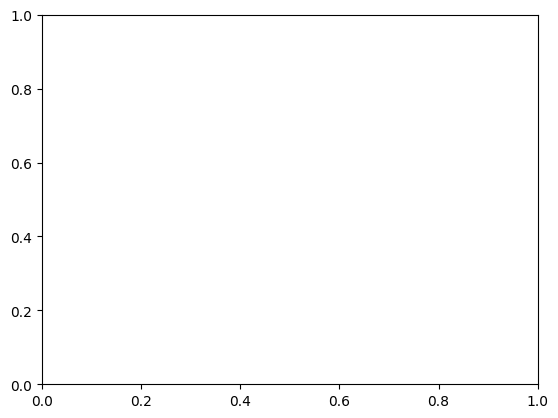

In [50]:
geo = gpd.read_file('geodt.geojson')
geo[geo['date'] == 10].plot(column='fire_prediction')

In [ ]:
geo[geo['date'] == 10].columns

Index(['scale0', 'NDVI', 'NDMI', 'NDBI', 'NDSI', 'NDWI', 'osmnx', 'landcover',
       'population', 'elevation', 'foret_landcover', 'foret', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', 'date', 'temp16', 'dwpt16', 'rhum16', 'prcp16',
       'wdir16', 'wspd16', 'prec24h16', 'temp', 'dwpt', 'rhum', 'prcp', 'wdir',
       'wspd', 'prec24h', 'dc', 'ffmc', 'dmc', 'isi', 'bui', 'fwi',
       'daily_severity_rating', 'nesterov', 'munger', 'kbdi', 'angstroem',
       'days_since_rain', 'sum_consecutive_rainfall', 'sum_last_7_days',
       'nbfirepoint', 'date_str', 'longitude', 'latitude', 'id', 'highway',
       'departement', 'dailySeverityRating', 'O3', 'NO2', 'PM10', 'PM25',
       'weights', 'fire_prediction_raw', 'fire_prediction',
       'fire_prediction_dept', 'geometry'],
      dtype='object')

In [ ]:
geo

,hex_id,index_right,code_insee,nom,nuts3,wikipedia,surf_km2,temperature,dwpt,humidite,...,nesterov,munger,kbdi,angstroem,date,departement_encoding,fire_prediction,fire_prediction_raw,fire_prediction_dept,geometry
0,871f90acaffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.155281,11.210395,67.950962,...,1760.830018,0.0,4.696935,4.095985,2024-05-23 12:00:00,1,0.0,1.239788,2,"POLYGON ((4.72452 45.99659, 4.72660 45.98450, ..."
1,871f90aebffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.214823,11.508224,68.969937,...,3149.321805,0.0,9.311680,4.220394,2024-05-23 12:00:00,1,0.0,0.804546,2,"POLYGON ((4.73040 46.05308, 4.73248 46.04100, ..."
2,871f90accffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.155281,11.210395,67.950962,...,1760.830018,0.0,4.696935,4.095985,2024-05-23 12:00:00,1,0.0,0.931937,2,"POLYGON ((4.71826 46.03284, 4.72035 46.02076, ..."
3,871f91a76ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.005047,9.639753,65.879708,...,0.669628,0.0,0.276103,3.781205,2024-05-23 12:00:00,1,0.0,0.814242,2,"POLYGON ((6.14109 46.36974, 6.14298 46.35762, ..."
4,871f90366ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.163788,10.970350,66.884169,...,740.595221,0.0,1.764461,3.964602,2024-05-23 12:00:00,1,0.0,0.731435,2,"POLYGON ((4.73077 45.96032, 4.73285 45.94823, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,871f90349ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.221781,10.708998,65.511685,...,0.000000,0.0,0.000000,3.799998,2024-05-23 12:00:00,1,0.0,1.154223,2,"POLYGON ((4.89573 45.90879, 4.89779 45.89668, ..."
1288,871f90acbffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.188114,11.096933,67.319538,...,1363.092571,0.0,3.630674,4.005648,2024-05-23 12:00:00,1,0.0,1.239788,2,"POLYGON ((4.75503 46.00083, 4.75711 45.98874, ..."
1289,871f91c56ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.232727,11.505047,73.320194,...,0.000000,0.0,0.004287,5.328332,2024-05-23 12:00:00,1,1.0,3.158632,2,"POLYGON ((5.21395 46.06352, 5.21597 46.05141, ..."
1290,871f91b98ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.249501,9.381036,63.818352,...,0.000000,0.0,0.265458,3.649365,2024-05-23 12:00:00,1,0.0,0.894334,2,"POLYGON ((5.84281 46.25760, 5.84474 46.24548, ..."


In [ ]:
geo.id.unique().shape

(23,)

In [ ]:
geo.fire_prediction

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1287    0.0
1288    0.0
1289    1.0
1290    0.0
1291    0.0
Name: fire_prediction, Length: 1292, dtype: float64

In [ ]:
geo.columns

Index(['hex_id', 'index_right', 'code_insee', 'nom', 'nuts3', 'wikipedia',
       'surf_km2', 'temperature', 'dwpt', 'humidite', 'precipitations',
       'neige', 'direction_vent', 'vitesse_vent', 'pres', 'prec24h',
       'prec24h12', 'temp16', 'dwpt16', 'rhum16', 'prcp16', 'wdir16', 'wspd16',
       'prec24h16', 'temp15h', 'rhum15h', 'temp12h', 'rhum12h', 'temp24max',
       'prec24veille', 'sum_last_7_days', 'sum_consecutive_rainfall', 'dc',
       'ffmc', 'dmc', 'isi', 'bui', 'fwi', 'daily_severity_rating', 'nesterov',
       'munger', 'kbdi', 'angstroem', 'date', 'departement_encoding',
       'fire_prediction', 'fire_prediction_raw', 'fire_prediction_dept',
       'geometry'],
      dtype='object')

<Axes: >

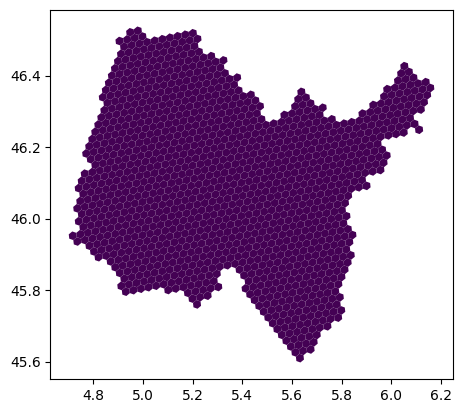

In [ ]:
geo.plot(column='departement_encoding')

In [ ]:
geo

,hex_id,index_right,code_insee,nom,nuts3,wikipedia,surf_km2,temperature,dwpt,humidite,...,nesterov,munger,kbdi,angstroem,date,departement_encoding,fire_prediction,fire_prediction_raw,fire_prediction_dept,geometry
0,871f90acaffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.155281,11.210395,67.950962,...,1760.830018,0.0,4.696935,4.095985,2024-05-23 12:00:00,1,0.0,1.239788,2,"POLYGON ((4.72452 45.99659, 4.72660 45.98450, ..."
1,871f90aebffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.214823,11.508224,68.969937,...,3149.321805,0.0,9.311680,4.220394,2024-05-23 12:00:00,1,0.0,0.804546,2,"POLYGON ((4.73040 46.05308, 4.73248 46.04100, ..."
2,871f90accffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.155281,11.210395,67.950962,...,1760.830018,0.0,4.696935,4.095985,2024-05-23 12:00:00,1,0.0,0.931937,2,"POLYGON ((4.71826 46.03284, 4.72035 46.02076, ..."
3,871f91a76ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.005047,9.639753,65.879708,...,0.669628,0.0,0.276103,3.781205,2024-05-23 12:00:00,1,0.0,0.814242,2,"POLYGON ((6.14109 46.36974, 6.14298 46.35762, ..."
4,871f90366ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.163788,10.970350,66.884169,...,740.595221,0.0,1.764461,3.964602,2024-05-23 12:00:00,1,0.0,0.731435,2,"POLYGON ((4.73077 45.96032, 4.73285 45.94823, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1287,871f90349ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.221781,10.708998,65.511685,...,0.000000,0.0,0.000000,3.799998,2024-05-23 12:00:00,1,0.0,1.154223,2,"POLYGON ((4.89573 45.90879, 4.89779 45.89668, ..."
1288,871f90acbffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,17.188114,11.096933,67.319538,...,1363.092571,0.0,3.630674,4.005648,2024-05-23 12:00:00,1,0.0,1.239788,2,"POLYGON ((4.75503 46.00083, 4.75711 45.98874, ..."
1289,871f91c56ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.232727,11.505047,73.320194,...,0.000000,0.0,0.004287,5.328332,2024-05-23 12:00:00,1,1.0,3.158632,2,"POLYGON ((5.21395 46.06352, 5.21597 46.05141, ..."
1290,871f91b98ffffff,52,01,Ain,FR711,fr:Ain (département),5784.0,16.249501,9.381036,63.818352,...,0.000000,0.0,0.265458,3.649365,2024-05-23 12:00:00,1,0.0,0.894334,2,"POLYGON ((5.84281 46.25760, 5.84474 46.24548, ..."


In [ ]:
import pandas as pd
file = pd.read_feather('incendie_final.feather')
file

,hex_id,geometry,temp,dwpt,rhum,prcp,snow,wdir,wspd,pres,...,angstroem,date,feux,feux-1,feux-2,feux-3,feux-4,feux-5,feux-6,feux-7
0,871f91d93ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,13.865036,4.822199,54.748180,0.066479,0.0,193.338577,3.475606,1006.460973,...,4.569146,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,871f91c58ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,13.735273,6.055540,59.679911,0.106560,0.0,177.443387,4.769560,1005.734537,...,4.063836,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,871f91d35ffffff,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...",12.599896,5.663533,62.871477,0.200118,0.0,196.690551,3.560654,1005.817675,...,4.960926,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,871f91719ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,13.038718,6.171794,63.103240,0.105603,0.0,179.965228,3.140982,1006.910620,...,4.518201,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,871f95600ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,12.602616,5.698433,62.983199,0.199515,0.0,195.967915,3.613862,1005.801541,...,4.938387,2024-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65887,871f90349ffffff,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...",20.502977,8.081746,44.575062,0.000053,0.0,221.410818,4.792018,1008.691934,...,2.962941,2024-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65888,871f90acbffffff,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...",20.189978,9.417559,50.249506,0.000056,0.0,207.321521,3.918180,1008.678549,...,3.397652,2024-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65889,871f91c56ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,19.263008,9.504984,53.117825,0.004447,0.0,208.490028,4.333686,1008.802981,...,3.526426,2024-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65890,871f91b98ffffff,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x07\x00...,20.568591,8.728703,46.472258,0.000000,0.0,247.868180,5.380732,1007.378257,...,3.404193,2024-05-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
file.columns

Index(['hex_id', 'geometry', 'temp', 'dwpt', 'rhum', 'prcp', 'snow', 'wdir',
       'wspd', 'pres', 'prec24h', 'prec24h12', 'temp16', 'dwpt16', 'rhum16',
       'prcp16', 'wdir16', 'wspd16', 'prec24h16', 'temp12', 'dwpt12', 'rhum12',
       'prcp12', 'wdir12', 'wspd12', 'temp15h', 'rhum15h', 'temp12h',
       'rhum12h', 'temp24max', 'prec24veille', 'sum_last_7_days',
       'sum_consecutive_rainfall', 'dc', 'days_since_rain', 'ffmc', 'dmc',
       'isi', 'bui', 'fwi', 'daily_severity_rating', 'nesterov', 'munger',
       'kbdi', 'angstroem', 'date', 'feux', 'feux-1', 'feux-2', 'feux-3',
       'feux-4', 'feux-5', 'feux-6', 'feux-7'],
      dtype='object')

In [ ]:
geo.columns

Index(['hex_id', 'index_right', 'code_insee', 'nom', 'nuts3', 'wikipedia',
       'surf_km2', 'temperature', 'dwpt', 'humidite', 'precipitations',
       'neige', 'direction_vent', 'vitesse_vent', 'pres', 'prec24h',
       'prec24h12', 'temp16', 'dwpt16', 'rhum16', 'prcp16', 'wdir16', 'wspd16',
       'prec24h16', 'temp15h', 'rhum15h', 'temp12h', 'rhum12h', 'temp24max',
       'prec24veille', 'sum_last_7_days', 'sum_consecutive_rainfall', 'dc',
       'ffmc', 'dmc', 'isi', 'bui', 'fwi', 'daily_severity_rating', 'nesterov',
       'munger', 'kbdi', 'angstroem', 'date', 'departement_encoding',
       'fire_prediction', 'fire_prediction_raw', 'fire_prediction_dept',
       'geometry'],
      dtype='object')